In [1]:
import tensorflow as tf
from keras import layers, models

def VGGNet():
    model = models.Sequential()

    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(90, 90, 3)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dense(9, activation='softmax')) # Assuming 1000 classes in the dataset

    return model

In [2]:
# 데이터 경로 설정
data_dir = r"C:\Users\angel\Desktop\font_original_9"
train_dir = r"C:\Users\angel\Desktop\font_classifier_9\train"
test_dir = r"C:\Users\angel\Desktop\font_classifier_9\test"

In [5]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

# 이미지 데이터를 불러오기 위한 ImageDataGenerator 설정
datagen = ImageDataGenerator(rescale=1./255)
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(90, 90),
    batch_size=32,
    class_mode='categorical'
)

Found 50274 images belonging to 9 classes.


In [6]:
# VGGNet 모델 생성
model = VGGNet()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# 모델 학습
results = model.fit(train_generator, steps_per_epoch=100, epochs=300)

Epoch 1/300
100/100 [==============================] - 526s 5s/step - loss: 2.1977 - accuracy: 0.1044
Epoch 2/300
100/100 [==============================] - 478s 5s/step - loss: 2.1973 - accuracy: 0.1138
Epoch 3/300
100/100 [==============================] - 487s 5s/step - loss: 2.1973 - accuracy: 0.1128
Epoch 4/300
100/100 [==============================] - 468s 5s/step - loss: 2.1974 - accuracy: 0.1151
Epoch 5/300
100/100 [==============================] - 341s 3s/step - loss: 2.1974 - accuracy: 0.1069
Epoch 6/300
100/100 [==============================] - 344s 3s/step - loss: 2.1974 - accuracy: 0.1041
Epoch 7/300
100/100 [==============================] - 339s 3s/step - loss: 2.1975 - accuracy: 0.1112
Epoch 8/300
100/100 [==============================] - 337s 3s/step - loss: 2.1974 - accuracy: 0.1059
Epoch 9/300
100/100 [==============================] - 338s 3s/step - loss: 2.1970 - accuracy: 0.1166
Epoch 10/300
100/100 [==============================] - 346s 3s/step - loss: 2.197

In [11]:

# 테스트 데이터셋 불러오기
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(90, 90),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # 테스트 데이터셋은 섞지 않도록 설정
)

Found 30168 images belonging to 9 classes.


In [12]:
# 모델 평가
loss, accuracy = model.evaluate(test_generator, steps=100)
print(f"테스트 데이터셋 손실: {loss:.4f}, 정확도: {accuracy:.4f}")

100/100 [==============================] - 83s 814ms/step - loss: 2.2076 - accuracy: 0.0000e+00
테스트 데이터셋 손실: 2.2076, 정확도: 0.0000


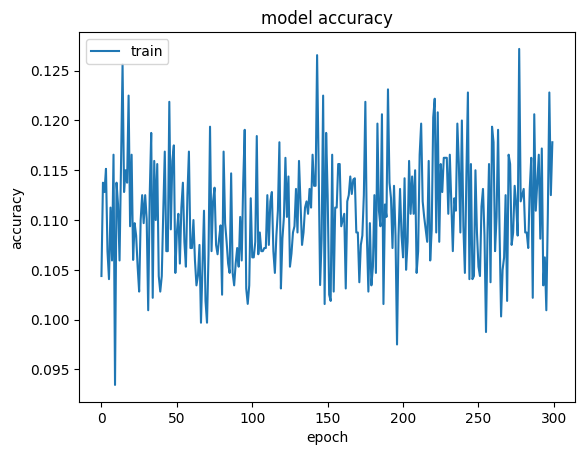

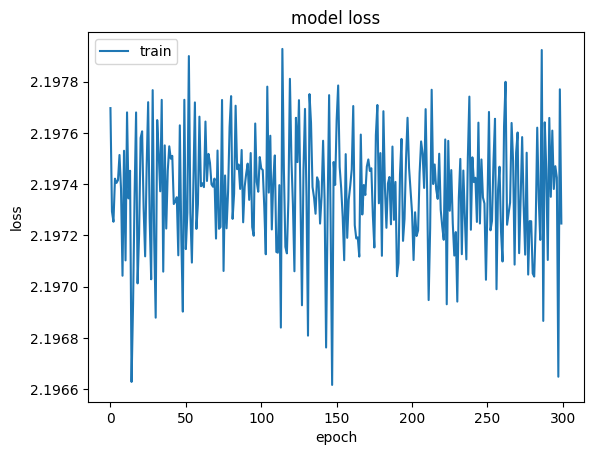

In [15]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(results.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()